# A look at reasons justifying  Book Bans

## Final Data Report
## Madison Zellers
## 12/10/2024

I have decided to take on this topic of book banning because I have always enjoyed reading and in the past year I have read more then I have ever. This is also a topic/issue that I have been aware of for a while. I understand the weight that books have on people and how much books can be valuable to someone's life. Taking away certain books from a school where a kid may not have the resources or time to look elsewhere is limited them from many learning/discovery opportunities.

## Accessing The Data and Data Explanations

I first got to the google sheet and then made my own copy. I had to change the sharing settings in the top right corner to anyone with the link can access the sheet to be able to use it on this notebook and then I changed the format to a CSV file directly in the notebook and then above I made the sheet ID a variable and had the link export onto the notebook in a CSV format. I also had to edit the sheet because the sheet did not have the columns labeled like the index did on the page.

In [28]:
gsheet_id = "1Wxd44H7vu9_E16sNpeRAkcpVZAoE62xzOu75Wg3xiwk"
gkey_id = "1_-c9Kx_sYY1h5UAdZT2DQk8_EIBhvdlxL-PYxH2in0o"

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I collected this data from the PEN America Index of School Book Bans from the 2022-2023 school year. They collected their data through public information from school districts and local news sources. They also go through an independent verification process. PEN acknowledges that this is only a portion of the book bans since some bans are discretely censored or not reported. This index has 3,362 instances. It is originally a searchable index on the webpage, but you can gain access and download it through a google sheet.

[You can find the searchable index here](https://pen.org/book-bans/2023-banned-book-list/)

In [30]:
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{gsheet_id}/export?format=csv")
df.head()


,Title,Author,Secondary Author,Illustrator(s),Translators(s),Series Name,State,District,Date of Challenge,Ban Status,Origin of Challenge
0,#Hockey,"Ukazu, Ngozi",NaN,NaN,NaN,"Check, Please!",Texas,Frisco Independent School District,November 2022,Banned from Libraries and Classrooms,Informal Challenge
1,#Hockey,"Ukazu, Ngozi",NaN,NaN,NaN,"Check, Please!",Florida,Clay County School District,AY 2022-2023,Banned Pending Investigation,Administration/Formal Challenge
2,10 Things I Can See from Here,"Mac, Carrie",NaN,NaN,NaN,NaN,Florida,Escambia County Public Schools,June 2023,Banned Pending Investigation,Formal Challenge
3,"10,000 Dresses","Ewert, Marcus",NaN,"Ray, Rex",NaN,NaN,Florida,Clay County School District,AY 2022-2023,Banned Pending Investigation,Administration/Formal Challenge
4,"10,000 Dresses","Ewert, Marcus",NaN,"Ray, Rex",NaN,NaN,Florida,Seminole County Public Schools,July 2022,Banned from Libraries,Formal Challenge


This is an index describing the definition of columns That PEN provided.

In [31]:
key = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{gkey_id}/export?format=csv")
pd.options.display.max_colwidth = 400
key.head(16)

,Key for Columns,Description
0,Title,The publisher given title of a banned book.
1,Primary Author,First author listed on a banned book.
2,Secondary Author(s),Additional authors listed on a banned book.
3,Illustrator(s),All illustrators listed on a banned book.
4,Series Name,The publisher defined name of a collection of titles that are often thematically or sequentially related.
5,State,State where a ban has taken place.
6,School District,District where a ban has taken place.
7,Date of Challenge/Removal,The approximate month and year when a book was first noted as removed or prohibited based on available public documents.
8,Type of Ban,"Indicates one of four types of bans, including 'Banned from Libraries and Classrooms,' 'Banned from Libraries,' 'Banned from Classrooms,' or 'Banned Pending Investigation.'"
9,Banned from Libraries and Classrooms,These represent instances where individual titles were placed off-limits for students in either some or all libraries and classrooms.


## Cleaning the data

My plan is to drop some of the columns such as secondary author, illustrators, translators, and series name so I can primarily focus on information like the location, the status, how the challenge was brought about and the most important information about what book was challenged and analyze patterns within that information. I would like to focus on the titles that are being challenged the most and the differences with the titles that are being banned because of legislative action. I initially wanted to more focus on reoccuring themes in these book title, but have found that this would be more difficult because in the columns there is not really a column specifying or documenting why the book has been challenged or what the general content of the title is. I can only really make inferences of the content of these titles based on the titles and searching the synopsis of individual titles, which is not really enough to prove anything or do an analysis on. If there was not over 3,000 titles maybe I could have recorded the data onto the sheet myself.

In [32]:
df_drop = df.drop(columns = ['Secondary Author', 'Illustrator(s)', 'Translators(s)', 'Series Name'])
df_drop.head(22)

,Title,Author,State,District,Date of Challenge,Ban Status,Origin of Challenge
0,#Hockey,"Ukazu, Ngozi",Texas,Frisco Independent School District,November 2022,Banned from Libraries and Classrooms,Informal Challenge
1,#Hockey,"Ukazu, Ngozi",Florida,Clay County School District,AY 2022-2023,Banned Pending Investigation,Administration/Formal Challenge
2,10 Things I Can See from Here,"Mac, Carrie",Florida,Escambia County Public Schools,June 2023,Banned Pending Investigation,Formal Challenge
3,"10,000 Dresses","Ewert, Marcus",Florida,Clay County School District,AY 2022-2023,Banned Pending Investigation,Administration/Formal Challenge
4,"10,000 Dresses","Ewert, Marcus",Florida,Seminole County Public Schools,July 2022,Banned from Libraries,Formal Challenge
5,"1001 Comics You Must Read Before You Die: The Ultimate Guide to Comic Books, Graphic Novels, and Manga","Gravett, Paul",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
6,101 Questions About Reproduction: Or How 1 + 1 = 3 or 4 or More,"Brynie, Faith Hickman",Utah,Washington County School District,February 2023,Banned from Libraries,Administration
7,11/22/63: A Novel,"King, Stephen",Virginia,Madison County Public Schools,January 2023,Banned from Libraries and Classrooms,Administration
8,13 Art Inventions Children Show Know,"Heine, Florian",Florida,Brevard Public Schools,June 2023,Banned from Libraries and Classrooms,Informal Challenge
9,19 Love Songs,"Levithan, David",Florida,Clay County School District,AY 2022-2023,Banned Pending Investigation,Administration/Formal Challenge


 I was able to filter out and focus on the bans only in Missouri

In [33]:
missouri_df = df_drop[df_drop['State'] == 'Missouri']

In [85]:
missouri_df.head()
#missouri_df.head(60)

,Title,Author,State,District,Date of Challenge,Ban Status,Origin of Challenge
5,"1001 Comics You Must Read Before You Die: The Ultimate Guide to Comic Books, Graphic Novels, and Manga","Gravett, Paul",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
13,1984: The Graphic Novel,"Orwell, George",Missouri,Kirkwood School District,October 2022,Banned from Libraries and Classrooms,Legislative Action
18,50 Artists You Should Know,"Köster, Thomas",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
19,50 Paintings You Should Know,"Lowis, Kristina",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
20,50 Sculptures You Should Know,"Kühl, Isabel",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action


In [86]:
missouri_df.tail()
#missouri_df.tail(60)

,Title,Author,State,District,Date of Challenge,Ban Status,Origin of Challenge
3334,Writing and Illustrating the Graphic Novel: Everything You Need to Know to Create Great Graphic Works,"Chinn, Mike",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
3336,X-Men: Age of X,"Carey, Mike",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
3351,Zahra's Paradise,Amir,Missouri,North Kansas City Schools,September 2022,Banned from Libraries,Legislative Action
3352,Zahra's Paradise,Amir,Missouri,Rockwood School District,August 2022,Banned from Libraries and Classrooms,Legislative Action
3353,Zahra's Paradise,Amir,Missouri,Webster Groves School District,September 2022,Banned from Libraries,Legislative Action


This data frame describes the count being the amount of times a book was banned, the number of unique values, the most frequent values and how frequent they were. 

In [36]:
missouri_df.to_csv('missouri_file.csv', index = False)
missouri_df.describe()

,Title,Author,State,District,Date of Challenge,Ban Status,Origin of Challenge
count,333,333,333,333,333,333,333
unique,282,215,1,14,8,3,4
top,The Handmaid's Tale: The Graphic Novel,"Kirkman, Robert",Missouri,Wentzville School District,September 2022,Banned Pending Investigation,Legislative Action
freq,9,16,333,217,250,217,311


## Results/Analysis

This is only a very small portion of the data, which is in alphabetical order by title, if you look at these titles all of the legislative actions take place in Missouri, which makes sense because Missouri has a law banning books with sexually explicit content in schools that was actually passed in 2022 so around the time a lot of these books were banned. What is interesting to me is that if it was a state wide law you would think that these books would be banned across many more districts if it was like a legislative problem, but I assume it is because that was the district that actually had those books in possession while other districts never had those accessible to begin with.   Many say that the language of this law is very vague and the ACLU actually sued them over the vague language so I think that could be interesting to delve into the wording of this legislation

### Legislation

573.550.  Providing explicit sexual material to a student, offense of — penalty — definitions. — 1.  A person commits the offense of providing explicit sexual material to a student if such person is affiliated with a public or private elementary or secondary school in an official capacity and, knowing of its content and character, such person provides, assigns, supplies, distributes, loans, or coerces acceptance of or the approval of the providing of explicit sexual material to a student or possesses with the purpose of providing, assigning, supplying, distributing, loaning, or coercing acceptance of or the approval of the providing of explicit sexual material to a student.

  2.  The offense of providing explicit sexual material to a student is a class A misdemeanor.

  3.  As used in this section, the following terms shall mean:

  (1)  "Explicit sexual material", any pictorial, three-dimensional, or visual depiction, including any photography, film, video, picture, or computer-generated image, showing human masturbation, deviate sexual intercourse as defined in section 566.010, sexual intercourse, direct physical stimulation of genitals, sadomasochistic abuse, or emphasizing the depiction of postpubertal human genitals; provided, however, that works of art, when taken as a whole, that have serious artistic significance, or works of anthropological significance, or materials used in science courses, including but not limited to materials used in biology, anatomy, physiology, and sexual education classes shall not be deemed to be within the foregoing definition;

  (2)  "Person affiliated with a public or private elementary or secondary school in an official capacity", an administrator, teacher, librarian, media center personnel, substitute teacher, teacher's assistant, student teacher, law enforcement officer, school board member, school bus driver, guidance counselor, coach, guest lecturer, guest speaker, or other nonschool employee who is invited to present information to students by a teacher, administrator, or other school employee.  Such term shall not include a student enrolled in the elementary or secondary school.

 Above is the law word for word and initially the first thing that got my attention is under the explanation of number one it says there are exceptions for works that as whole that are deemed significant in artistic or educational value are exceptions to this rule. Out of the sample size above the main titles of the books that were banned were, "50 Artists You Should Know", "50 Paintings You Should Know", "50 Sculptures You Should Know", and "50 Women Artists You Should Know" so that does not really make sense to me. This initial finding has inspired me to look more into it and find discrepancies in the titles of the book being banned and the criteria of a book being banned in the state of Missouri. When you go into the searchable index and search, "Missouri Art" so many more titles pop up. Books about photography,watercolor, oil painting, drawing, art history, and more.

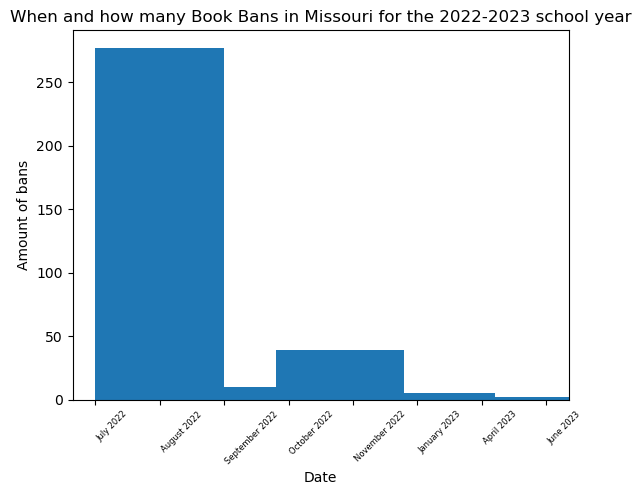

In [37]:
fig1, ax1 = plt.subplots()
ax1.hist(missouri_df['Date of Challenge'],bins = 5,width=2, linewidth= 1) 
plt.gcf().set_size_inches
plt.xticks(rotation= 45, ha = "left")
plt.xticks(fontsize = 6)  
ax1.set_title('When and how many Book Bans in Missouri for the 2022-2023 school year')
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount of bans')
# making sure the x axis is in chronological order
desired_order = ['July 2022','August 2022','September 2022', 'October 2022', 'November 2022','January 2023', 'April 2023', 'June 2023']
plt.xticks(range(len(desired_order)), desired_order) 
plt.show()

This is a visual that is further proving that most of the books were banned right when the legislation was passed and toward the beginning of the school year.

This next Histogram shows that the majority of these bans were in only a few school districts which is interesting to think about through the lens of knowing that these bans are stated as legislative actions, yet across the state the amount of bans seems to not be even somewhat consistent statewide. 

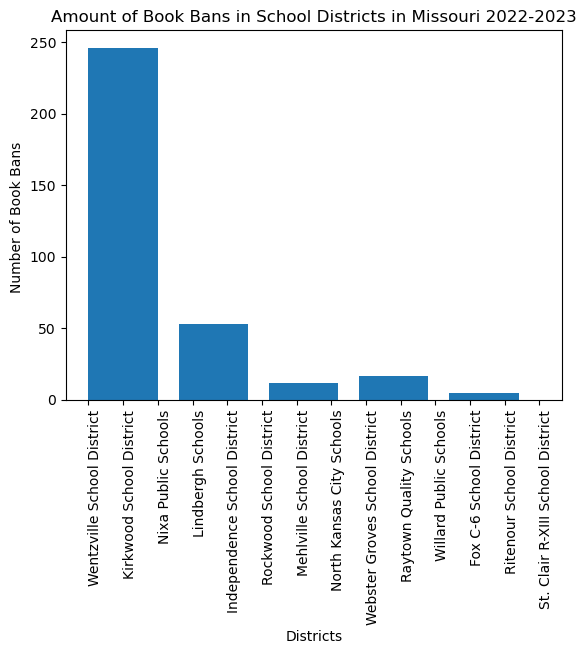

In [87]:
fig2, ax2 = plt.subplots()
ax2.hist(missouri_df['District'], width=2, linewidth= 1, bins = 5)    
plt.gcf().set_size_inches
plt.xticks(rotation=90, ha = "left")
plt.xticks(fontsize = 10)  
ax2.set_title('Amount of Book Bans in School Districts in Missouri 2022-2023')
ax2.set_xlabel('Districts')
ax2.set_ylabel('Number of Book Bans ')
plt.show()

### Miller Test

Another thing that is important to keep in mind when evaluating the subject matter of these titles is The Miller Test. The Miller Test is a legal test that tests whether a work of expression is obscene or not. PEN claims that most of the titles reportedly banned pass the Miller Test, but I would like to delve into a learn more about this myself. Though the Miller Test was rejected by the Supreme Court, it is used in many federal and state courts

The three criteria for the Miller Test States: 
(1) whether the average person applying contemporary community standards would find the work, taken as a whole, appeals to the prurient interest;
(2) whether the work depicts or describes, in a patently offensive way, sexual conduct specifically defined by the applicable state law; and
(3) whether the work, taken as a whole, lacks serious literary, artistic, political or scientific value.
also note that all three have to apply for it to not pass  

Something that I would like to note is that the third criteria for the Miller Test is very similar wording wise to the first section of the Missouri legislation talking a work that has significant educational value or lacking value that determines whether it is appropriate 

### The top book banned in Missouri: The Hanmaid's Tale: The Graphic Novel

Image from the graphic novel:

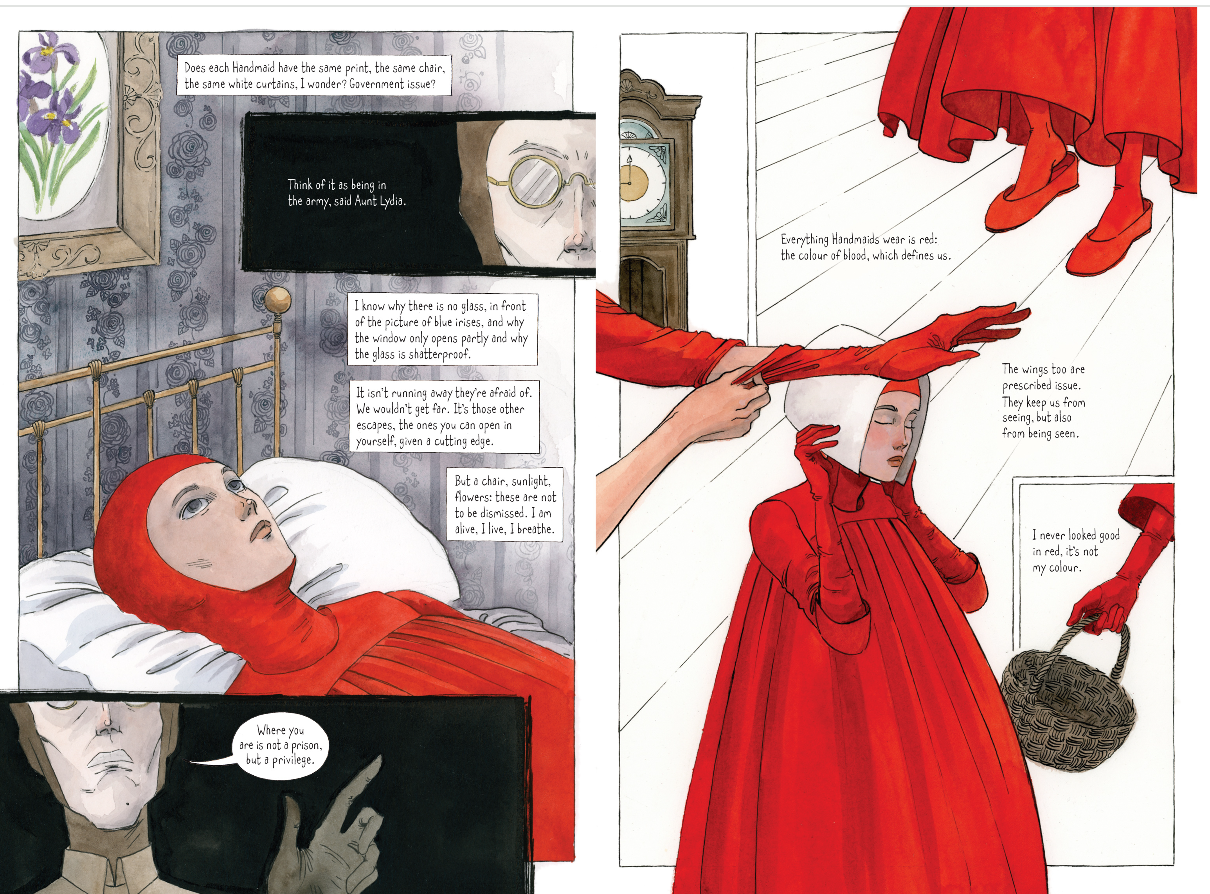

I want to focus on the most frequent title banned in Missouri that was shown in the describe() data frame which is The Hanmaid's Tale: The Graphic Novel. This title was also banned 10 other times as well between six other states. I personally have never read even the original or the graphic novel, I just know the general idea about the plot and I know it is considered a classic. Maybe graphic novels are not seen as being educational or serious enough in Missouri eye's, but I will argue that graphic novels can hold a lot of value. Graphic Novels help young adults grasp more difficult concepts and make them more accessible to understand. I also saw many other graphic novel or comic books titles being targeted like, "Writing and Illustrating the Graphic Novel: Everything You Need to Know to Create Great Graphic Works","1001 Comics You Must Read Before You Die: The Ultimate Guide to Comic Books, Graphic Novels, and Manga","Macbeth: The Graphic Novel", and many more.  Although I have not seen the contents inside myself except for the image above and other sample pages,referring to Miller's third criteria, would you really say that the Hanmaid's Tale holds no literary value or artistic value like in the first section of Missouri's law? I can see how maybe visually seeing depictions of the novel can be disturbing, but the themes and messages shine through with the visuals. Like this novel and many other dystopian novels, it makes you think about dangers in different possible social and political structures and highlights the importance of questioning and skepticism.

 PEN has also claimed that majority of the titles are books for a young adult audience. Based on this claim, the reason that most of these books are being banned is not due to it not being age appropriate for the students. 

### Quick acknowledgment on Sarah J. Maas 

As I was looking at the most frequent titles in Missouri and the most frequent titles in general, Sarah J. Maas as an author came up a lot. In an attempt to also see different angles and sides of this, I will say that I was initially surprised to find out that this author's audience was young adults and high school aged. It was a bit of a shock to me because it is very sexually explicit and I really see no educational value in it besides the fact that any reading could be good practice and skill building. I have never read them, but they are very popular and I initially thought the target audience was for like college aged girls. That being said I think it is a little overkill to have to get the government involved in it. I feel like local school districts should just have the discernment to be aware of the content and its potential harm and that disclaimers should be given on age-appropriateness as opposed to something as extreme as banning. Also I think it is more of a parents' responsibility to monitor what their kid is consuming. 

## Conclusions

So in conclusion based off the information and data I have, I believe that many of these book bans are not justifiable especially when you look at specifically Missouri and its specific legislation. Many of the titles banned as a whole do hold literary, artistic, political or scientific value. Some limitations that I acknowledge that I have is that there is just so many different titles that it really is hard to sort through all of them and be able to make conclusions and visualize them. Also I can see how some of the language in the Miller Test and the legislation can be subjective and interpreted differently. Others may not see this the way I do even though to me it seems very obviously not fitting the criteria with most of the actual books that are being banned. Also reflecting on doing this project as a whole I under estimated how different trying to make a report based on qualitative data vs quantitative data would be. In the class previously we mostly worked on what I believe to be quantitative. I feel like it was harder for me to tangibly prove what I was saying. As I was going through and completing this I was hoping this did not come off too much as an argumentative essay as opposed to a data report. Other approaches I could have taken is that while I mostly talk about art and graphic novels I could have addressed the fact that many of the titles being targeted have to do with critical race theory and LGBTQ+ topics, but thought that focusing on that would be huge undertaking and also something that was not as huge of a problem in Missouri which I chose to focus on as opposed to Florida. Next Steps would be to look at other sources besides PEN and to look at bans from the 2023-2024 year as there were even more that year.